In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import seaborn as sns
 
import os 
from os import path
from string import punctuation
%matplotlib inline

In [2]:
def clean_strings(val):
	no_punc = ""
	for char in val:
		if char not in (punctuation):
			no_punc += char

	return no_punc

In [3]:
####### list all files

files = [file for file in os.listdir("./") if file[-3:] == "csv"]
print(files)

['items.csv', 'item_categories.csv', 'sales_train.csv', 'sample_submission.csv', 'shops.csv', 'test.csv']


In [4]:
############################################# Shops.csv

shops = pd.read_csv("./shops.csv")

shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
print(shops.shape)

(60, 2)


In [6]:
# check any duplicates

print(shops.shape[0] == shops.nunique()) #true, no duplicate so far

shop_name    True
shop_id      True
dtype: bool


In [7]:
print(shops['shop_name'])

0                       !Якутск Орджоникидзе, 56 фран
1                       !Якутск ТЦ "Центральный" фран
2                                    Адыгея ТЦ "Мега"
3                      Балашиха ТРК "Октябрь-Киномир"
4                            Волжский ТЦ "Волга Молл"
5                              Вологда ТРЦ "Мармелад"
6                          Воронеж (Плехановская, 13)
7                              Воронеж ТРЦ "Максимир"
8                        Воронеж ТРЦ Сити-Парк "Град"
9                                   Выездная Торговля
10                         Жуковский ул. Чкалова 39м?
11                         Жуковский ул. Чкалова 39м²
12                                Интернет-магазин ЧС
13                                Казань ТЦ "Бехетле"
14                            Казань ТЦ "ПаркХаус" II
15                               Калуга ТРЦ "XXI век"
16                                   Коломна ТЦ "Рио"
17                      Красноярск ТЦ "Взлетка Плаза"
18                          

In [8]:
print(len(shops['shop_name']), len(set(shops['shop_name'])))

60 60


In [9]:
print(shops.duplicated('shop_name').unique())

[False]


In [10]:
groupbySize = shops.groupby('shop_id').size()

In [11]:
groupbySize

shop_id
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
59    1
dtype: int64

In [12]:
shops.isnull().sum()

shop_name    0
shop_id      0
dtype: int64

In [13]:
shops.sample(15)

,shop_name,shop_id
32,"Москва ТЦ ""Серебряный Дом""",32
1,"!Якутск ТЦ ""Центральный"" фран",1
3,"Балашиха ТРК ""Октябрь-Киномир""",3
39,"РостовНаДону ТРК ""Мегацентр Горизонт""",39
15,"Калуга ТРЦ ""XXI век""",15
41,"РостовНаДону ТЦ ""Мега""",41
10,Жуковский ул. Чкалова 39м?,10
13,"Казань ТЦ ""Бехетле""",13
48,"Томск ТРЦ ""Изумрудный Город""",48
53,"Уфа ТЦ ""Семья"" 2",53


In [14]:
###### Cleaning Shop names 

clean_shop_names = shops['shop_name'].apply(clean_strings)
clean_shop_names

0                       Якутск Орджоникидзе 56 фран
1                        Якутск ТЦ Центральный фран
2                                    Адыгея ТЦ Мега
3                       Балашиха ТРК ОктябрьКиномир
4                            Волжский ТЦ Волга Молл
5                              Вологда ТРЦ Мармелад
6                           Воронеж Плехановская 13
7                              Воронеж ТРЦ Максимир
8                         Воронеж ТРЦ СитиПарк Град
9                                 Выездная Торговля
10                         Жуковский ул Чкалова 39м
11                        Жуковский ул Чкалова 39м²
12                               Интернетмагазин ЧС
13                                Казань ТЦ Бехетле
14                            Казань ТЦ ПаркХаус II
15                               Калуга ТРЦ XXI век
16                                   Коломна ТЦ Рио
17                      Красноярск ТЦ Взлетка Плаза
18                               Красноярск ТЦ Июнь
19          

In [15]:
shops = shops.join(clean_shop_names, on=['shop_id'], rsuffix="_clean")
shops

,shop_name,shop_id,shop_name_clean
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск Орджоникидзе 56 фран
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск ТЦ Центральный фран
2,"Адыгея ТЦ ""Мега""",2,Адыгея ТЦ Мега
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха ТРК ОктябрьКиномир
4,"Волжский ТЦ ""Волга Молл""",4,Волжский ТЦ Волга Молл
5,"Вологда ТРЦ ""Мармелад""",5,Вологда ТРЦ Мармелад
6,"Воронеж (Плехановская, 13)",6,Воронеж Плехановская 13
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж ТРЦ Максимир
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж ТРЦ СитиПарк Град
9,Выездная Торговля,9,Выездная Торговля


In [16]:
items_cat = pd.read_csv("./item_categories.csv")
items_cat.shape


(84, 2)

In [17]:
items_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [18]:
items_cat.sample(10)

,item_category_name,item_category_id
2,Аксессуары - PS3,2
27,Игры MAC - Цифра,27
67,Подарки - Развитие,67
21,Игры - PSP,21
34,Карты оплаты - Live! (Цифра),34
81,Чистые носители (шпиль),81
61,Подарки - Атрибутика,61
8,Билеты (Цифра),8
75,Программы - Для дома и офиса,75
46,Книги - Бизнес литература,46


In [19]:
items_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [20]:
items_cat.describe()

,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


In [21]:
#### duplicates?
items_cat.shape[0] == items_cat.nunique()

item_category_name    True
item_category_id      True
dtype: bool

In [22]:
pd.set_option("display.max_rows", items_cat.shape[0])
items_cat

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [23]:
items = pd.read_csv("./items.csv")

items.shape

(22170, 3)

In [24]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [25]:
items.sample(10)

,item_name,item_id,item_category_id
11021,ДЖО (сериал),11021,40
7965,Xbox LIVE: GOLD карта подписки 12 месяцев + Eu...,7965,33
21749,ЧУДО-МЕЛЬНИЦА сб. м/ф (регион),21749,40
3124,ENYA And Winter Came,3124,55
16989,ПЕСНЯРЫ Через всю войну 2LP,16989,58
2044,Borderlands: The Pre-Sequel. набор «Двойник Кр...,2044,31
460,1С:Аудиотеатр. Ф.М. Достоевский. Братья Карама...,460,45
13387,Компл.вопр.серт.экзам.1С:Профессионал по техно...,13387,49
1813,"Batman: Рыцарь Аркхема [PC, Jewel, русские суб...",1813,30
19797,ТРАНСФОРМЕРЫ: ЭПОХА ИСТРЕБЛЕНИЯ (BD),19797,37


In [26]:
items.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [27]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [28]:
## find duplicated?

len(items['item_name']) == len(items['item_name']) # no duplicates?

True

In [29]:
print(items['item_name'].duplicated().unique()) #no duplicates

[False]


# Thursday April 16, 2020

# Sales

In [30]:
####### Sales
sales = pd.read_csv("./sales_train.csv")

In [31]:
print(sales.shape)

print("\n\n")

print(sales.head())

print("\n\n")

print(sales.describe())

print("\n\n")

print(sales.info())

(2935849, 6)



         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0



       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.00

In [34]:
sales['date_block_num'].unique(), sales['date_block_num'].nunique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
       dtype=int64),
 34)

In [35]:
sales['item_cnt_day'].unique(), sales['item_cnt_day'].nunique()

(array([ 1.000e+00, -1.000e+00,  3.000e+00,  2.000e+00,  4.000e+00,
         5.000e+00,  1.300e+01,  7.000e+00,  6.000e+00,  8.000e+00,
         1.000e+01,  1.100e+01,  3.000e+01,  2.200e+01,  1.400e+01,
         1.500e+01,  9.000e+00,  1.200e+01,  1.700e+01,  1.900e+01,
         2.000e+01, -5.000e+00, -6.000e+00, -3.000e+00, -2.000e+00,
         1.600e+01,  6.400e+01,  1.800e+01,  2.900e+01,  2.600e+01,
         3.900e+01,  2.100e+01,  2.700e+01,  5.300e+01,  2.500e+01,
         2.300e+01,  2.400e+01,  4.000e+01,  2.800e+01,  3.100e+01,
         3.600e+01, -4.000e+00,  3.200e+01,  3.500e+01,  4.100e+01,
         8.800e+01,  4.400e+01,  5.200e+01,  5.600e+01,  3.800e+01,
         3.400e+01,  5.700e+01,  6.900e+01,  3.700e+01,  4.700e+01,
         5.000e+01,  4.800e+01,  3.300e+01,  6.100e+01,  8.000e+01,
         4.200e+01,  8.200e+01,  2.000e+02,  1.000e+02,  7.600e+01,
         7.700e+01,  1.070e+02,  4.600e+01,  4.900e+01,  7.000e+01,
         5.500e+01,  6.000e+01,  4.500e+01,  7.1

In [36]:
### nulls?

print(sales.isnull().sum(axis=0).sum()) # no null? strange!!!

no_itemPrice = sales['item_price'] <= 0

print(sales[no_itemPrice]) #only item with -1.0 price. there must be some other mistakes also. Can be found in VIZ

0
              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
484683  15.05.2013               4       32     2973        -1.0           1.0


In [37]:
train = pd.read_csv("./sales_train.csv", parse_dates=['date'])
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [41]:
months = train['date'].dt.month

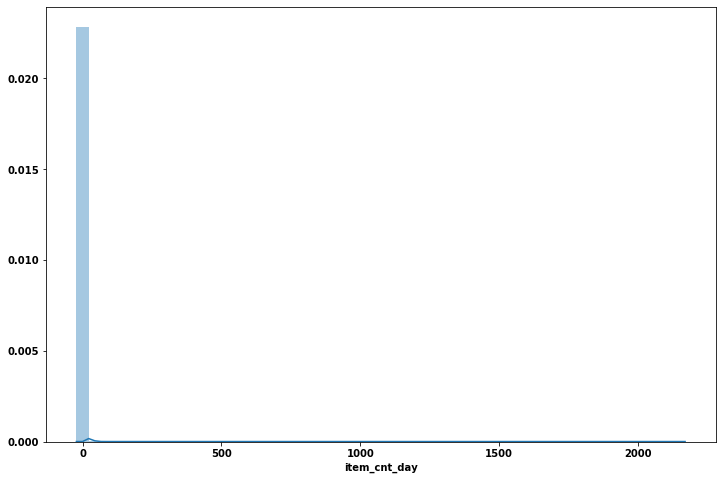

In [39]:
sns.distplot(train['item_cnt_day'])

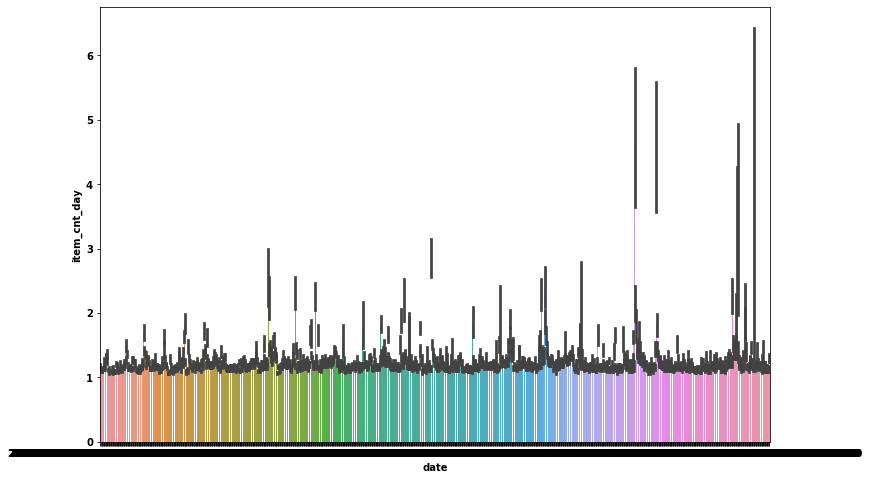

In [43]:
sns.barplot(train['date'], train['item_cnt_day'])

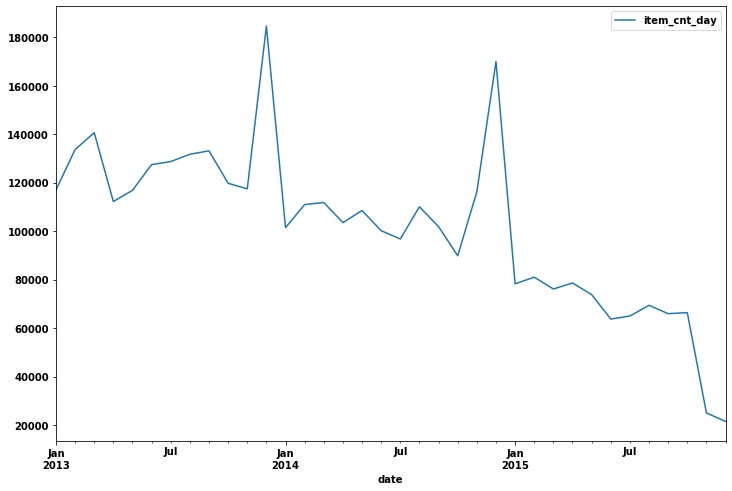

In [45]:
train[['date', 'item_cnt_day']].set_index('date').resample("M").sum().plot()

In [50]:
train[['date', 'item_cnt_day']].set_index('date').resample("M").sum().index.max()

Timestamp('2015-12-31 00:00:00', freq='M')

In [51]:
train[['date', 'item_cnt_day']].set_index('date').resample("M").sum().index.min()

Timestamp('2013-01-31 00:00:00', freq='M')

In [55]:
dateBlock0 = train['date_block_num'].isin([0])

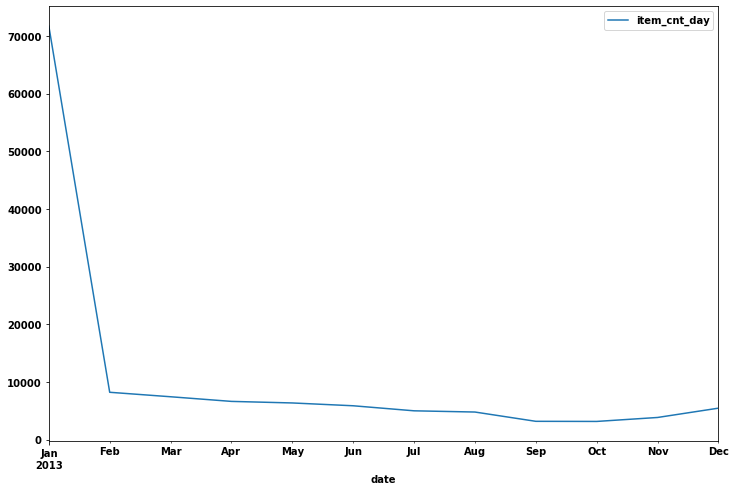

In [62]:
train[dateBlock0].set_index('date').resample("M").sum()['item_cnt_day'].plot()
plt.legend()

In [64]:
dateBlocks = train['date_block_num'].unique()
type(dateBlocks)

numpy.ndarray

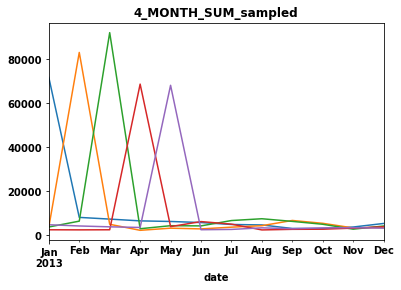

No handles with labels found to put in legend.


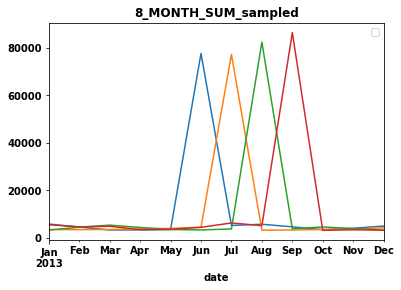

No handles with labels found to put in legend.


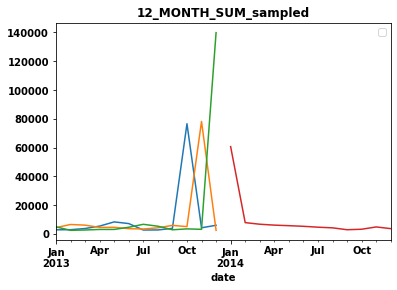

No handles with labels found to put in legend.


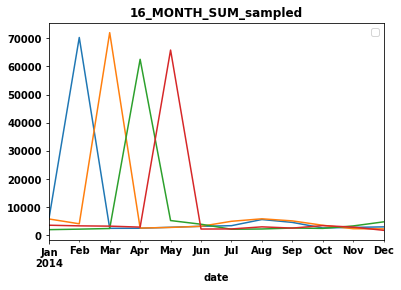

No handles with labels found to put in legend.


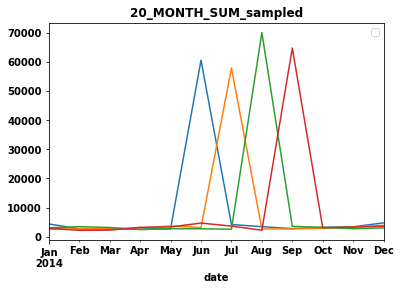

No handles with labels found to put in legend.


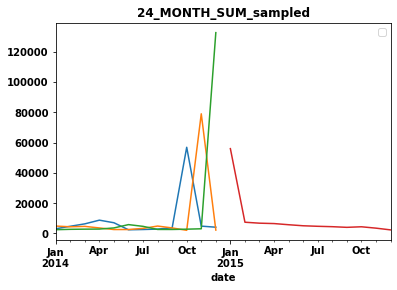

No handles with labels found to put in legend.


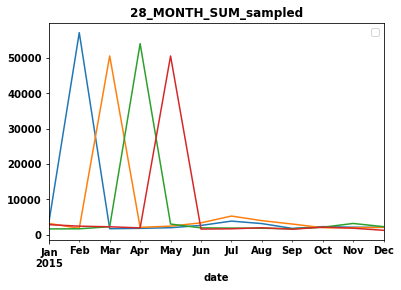

No handles with labels found to put in legend.


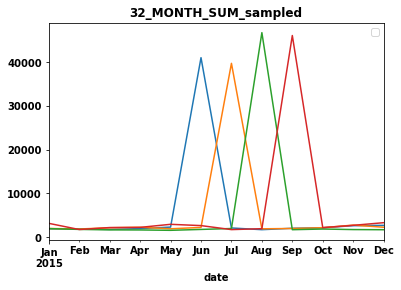

No handles with labels found to put in legend.


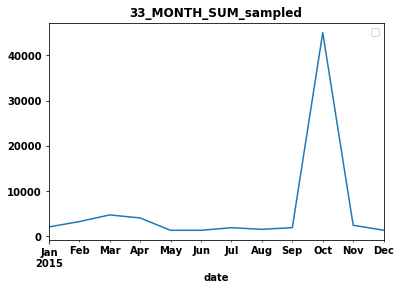

In [82]:
for (i,dateBlock) in enumerate(dateBlocks): 
    block = train['date_block_num'].isin([dateBlock])
    plt.title(f"{dateBlock}_MONTH_SUM_sampled")
    train[block].set_index('date').resample("M").sum()['item_cnt_day'].plot()
    if (i%4==0 and i!= 0): 
        plt.show()
        plt.legend()
